In [1]:
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Simulación

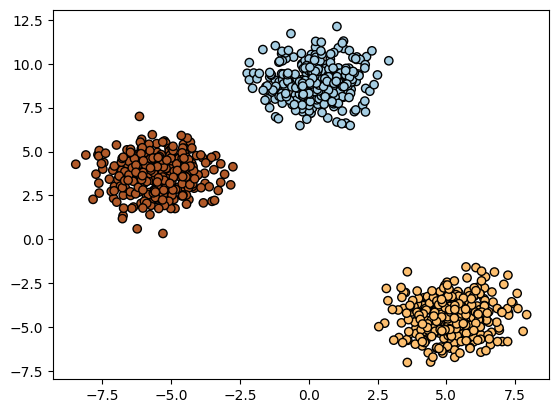

In [5]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)
y = y.reshape((len(y), 1))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')
plt.show()


## programación de perceptrón

In [6]:
class PerceptronMulticlass:
    def __init__(self, learning_rate, n_iters, n_classes):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.n_classes = n_classes
        self.weights = None
        self.biases = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Inicializar los pesos y sesgos para cada clase
        self.weights = np.zeros((self.n_classes, n_features))
        self.biases = np.zeros(self.n_classes)

        # Codificación de las clases (One vs Rest)
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                for j in range(self.n_classes):
                    # Salida lineal para la clase j
                    linear_output = np.dot(x_i, self.weights[j]) + self.biases[j]
                    y_predicted = self._unit_step_func(linear_output)

                    # Actualizar los pesos y sesgos solo si la predicción es incorrecta
                    if (y[idx] == j and y_predicted == 0) or (y[idx] != j and y_predicted == 1):
                        update = self.lr * ((y[idx] == j) - y_predicted)
                        self.weights[j] += update * x_i
                        self.biases[j] += update

    def predict(self, X):
        linear_outputs = np.dot(X, self.weights.T) + self.biases
        # Seleccionar la clase con la salida lineal más alta
        return np.argmax(linear_outputs, axis=1)

    def decision_boundary(self, X):
        return -(self.weights[0] * X + self.biases[0]) / self.weights[1]

    def plot_decision_boundary(self, X, y, title="Perceptron Multiclass Decision Boundary"):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o')

        x_min, x_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
        y_min, y_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        Z = np.array([self.predict(np.array([[xi, yi]])) for xi, yi in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

In [7]:
# Inicializar y entrenar el perceptrón multiclasificar
perceptron_multiclass = PerceptronMulticlass(learning_rate=0.01, n_iters=1000, n_classes=6)
perceptron_multiclass.fit(X, y)

# Predecir y visualizar los límites de decisión
perceptron_multiclass.plot_decision_boundary(X, y)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_46424\2703944417.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.biases[j] += update


In [ ]:
perceptron_multiclass.biases

array([-0.01,  0.01])

In [ ]:
perceptron.predict(np.array([6.5, 4.5]))

array(1)

In [ ]:
perceptron.predict(np.array([-3, 10]))

array(0)

## Predicciones y performance del modelo

In [ ]:
yhat = perceptron.predict(x)

In [ ]:
y = [float(x) for x in gt]

<ipython-input-24-2b4d1cd090fe>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = [float(x) for x in gt]


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
print(roc_auc_score(y,yhat)) ## roc auc

1.0


In [ ]:
print(accuracy_score(y,yhat))

1.0
